# Logistic Regression Model

In this notebook we will expirement with a decision tree to get an optimal predicted repair time.

## Imports

In [1]:
from pandas import read_csv as pd_read_csv
from numpy import sqrt as np_sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

## Fetching

In [2]:
df = pd_read_csv("../Data/CSV/cleaned.csv", sep=';', low_memory=False)
print(f'No less than {df.shape[0]} rows and {df.shape[1]} columns!')

No less than 252751 rows and 12 columns!


## Insight

In [3]:
corr = df.corr()
corr

,meldnummer,prioriteit,oorzaakcode,geocode,hersteltijd,hersteltijd_15
meldnummer,1.000000,0.027416,0.039500,0.023934,0.001151,0.001577
prioriteit,0.027416,1.000000,0.044717,0.066173,0.007058,0.002259
oorzaakcode,0.039500,0.044717,1.000000,0.161953,-0.061758,-0.054498
geocode,0.023934,0.066173,0.161953,1.000000,0.025621,0.025051
hersteltijd,0.001151,0.007058,-0.061758,0.025621,1.000000,0.994164
hersteltijd_15,0.001577,0.002259,-0.054498,0.025051,0.994164,1.000000


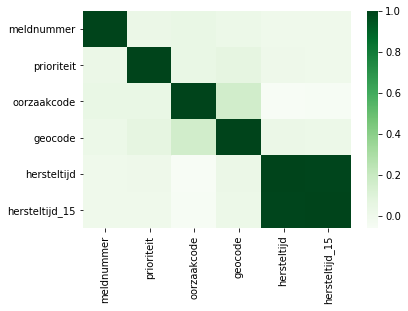

In [4]:
sns.heatmap(corr, cmap='Greens')

We can see that nothing correlates with the column "hersteltijd" like we concluded earlier in the data cleaning notebook. Nevertheless we will try to see what the results are.

## Model

In [5]:
model = LogisticRegression(solver='liblinear')

feature_names = ['prioriteit', 'oorzaakcode', 'geocode']
features = df[feature_names]
target_names = ['hersteltijd_15']
targets = df[target_names]

#: Split data into train set (80%) and test set (20%).
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, random_state=10)
model.fit(features_train, targets_train.values.ravel())
print(f'{len(features_train)} elementen in de trainset en {len(features_test)} elementen in de testset')

189563 elementen in de trainset en 63188 elementen in de testset


In [6]:
#: We calculate the module score by using the test set, 
#: this is why splitting your data into a training and test set is important.
score_1 = model.score(features_test, targets_test)

# An alternative way to calculate the predicted value is by predicting the model's targets by using the features test as input
# and scoring it against the actual targets of the test set.
targets_model = model.predict(features_test)
score_2 = accuracy_score(targets_test, targets_model)
print(f'Scores (methode 1 = {score_1}) and (methode 2 = {score_2}) so the methods are equal is {score_1 == score_2}.')
print(f'With a mean error of: {np_sqrt(mean_squared_error(targets_test, targets_model))}')

Scores (methode 1 = 0.33286383490536176) and (methode 2 = 0.33286383490536176) so the methods are equal is True.
With a mean error of: 54.98123604487461


The scores are not optimal but better then our previous result, the mean squared error is also miles better then our last attempt.

## Displaying

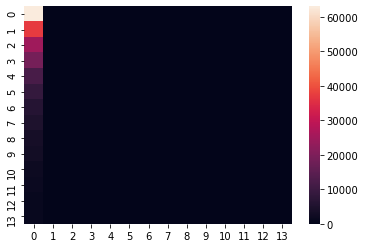

In [7]:
targets_model = model.predict(features_train)
conf = confusion_matrix(targets_train, targets_model)
sns.heatmap(conf)

We see that the model predicts 0 at a good rate but the rest of the predictions are really bad.

## Predicting

In [8]:
subset_df = pd_read_csv("../Data/CSV/subset.csv", sep=';')
features = subset_df[feature_names]
targets = subset_df['hersteltijd_15']
subset_df.head()

,meldnummer,oorzaakcode,prioriteit,melddatum,geocode,beschrijving,hersteltijd,hersteltijd_15,hersteltijd_dt
0,80774347,130,9,2014-07-31 10:28:00,555,test ESB,2,0,0
1,80626718,298,9,2011-07-31 11:43:00,666,"Mtna : E-boog AC-trip aangesproken, geen trei...",1,0,0
2,80878866,221,9,2017-01-31 10:43:25,564,Gvc : Inttel geeft fout melding.,186,180,180
3,80704628,221,9,2013-01-31 09:20:00,114,"Wspl : RH60 gelijkrichter defect, er staa een...",59,45,0
4,80651548,221,9,2012-01-31 01:52:00,76,Bv-Utg : sp BA t.o.b.s. gemaakt tijdens werkz...,155,150,0


In [9]:
targets_model = model.predict(features)
score = accuracy_score(targets, targets_model)
print(f'Score = {score}, predictions = {targets_model}, ground truth = {targets.values}.')

Score = 0.5, predictions = [0 0 0 0 0 0 0 0 0 0], ground truth = [  0   0 180  45 150   0 195   0   0  45].


With a score of 0.5 we would think that it does reasonable well but we see that all of the answers it uses is the default answer (0).

## Saving

In [10]:
subset_df['hersteltijd_lr'] = targets_model
subset_df.to_csv('../Data/CSV/subset.csv', sep=';', index=False)

## Conclusion

With a score of ~0.33 the model scores suboptimal, we would like to improve this and will look into other possible models like knn.